In [1]:
import os
import json

PG_RESULTS = "evaluation/PG160M"
PYTHIA_RESULTS = "evaluation/pythia160M"

TASKS = ["lambada_openai", "piqa", "winogrande", "wsc273", "arc_easy", "arc_challenge", "sciq", "logiqa"]

def extract_number(s):
    return int(''.join(filter(str.isdigit, s)))


def extract_data(path):

    data = {t: {"acc": [], "stderr": []} for t in TASKS}
    labels = []

    for root, _, files in os.walk(path):
        files = sorted(files, key=lambda x: extract_number(x))
        
        for f in files:

            with open(os.path.join(root, f), "r") as file:
                data_step = json.load(file)

            for k in data.keys():
                data[k]["acc"].append(data_step["results"][k]["acc,none"])
                data[k]["stderr"].append(data_step["results"][k]["acc_stderr,none"])

            labels.append(f[4:-5])
    
    return data, labels

pg_data, labels = extract_data(PG_RESULTS)
pythia_data, _ = extract_data(PYTHIA_RESULTS)

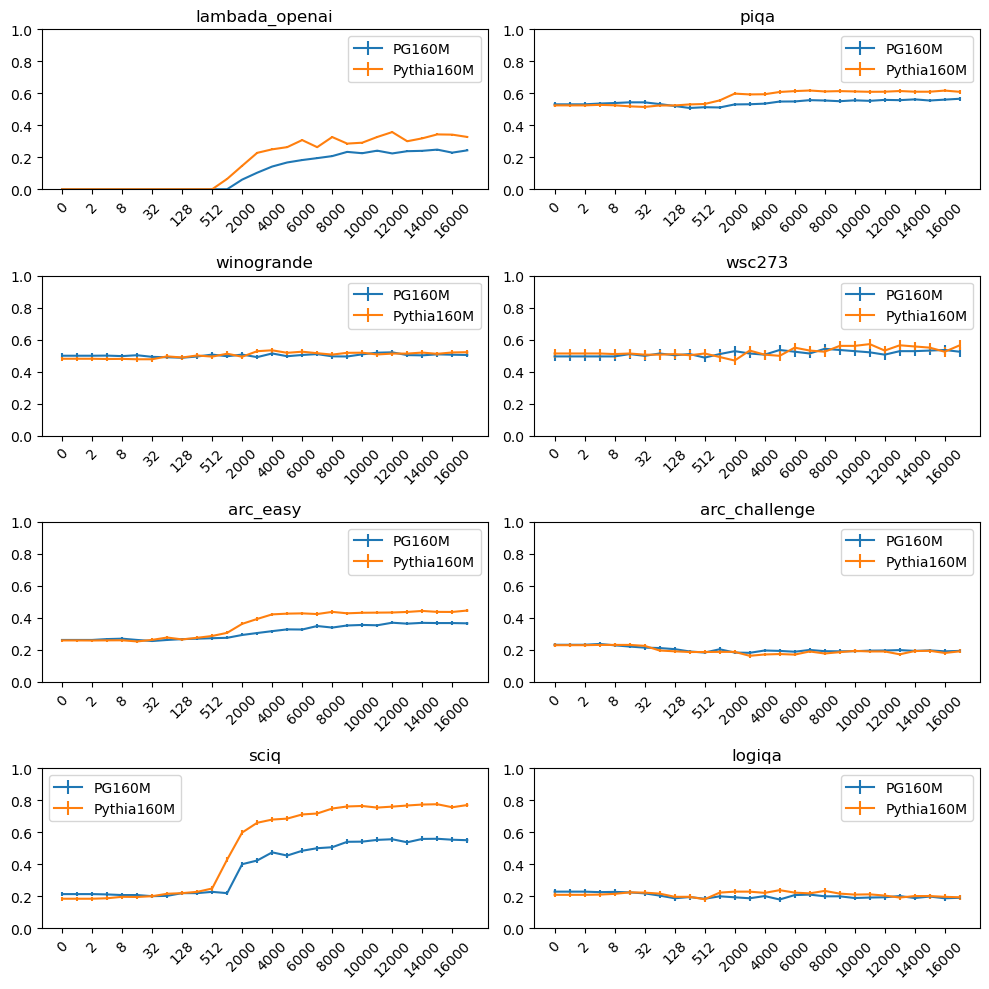

In [3]:
import matplotlib.pyplot as plt

# we have 8 task, so we will have 4 rows and 2 columns

fig, axs = plt.subplots(4, 2, figsize=(10, 10))

for i, k in enumerate(pg_data.keys()):

    row = i // 2
    col = i % 2

    axs[row, col].errorbar(labels, pg_data[k]["acc"], yerr=pg_data[k]["stderr"], label="PG160M")
    axs[row, col].errorbar(labels, pythia_data[k]["acc"], yerr=pythia_data[k]["stderr"], label="Pythia160M")

    axs[row, col].set_title(k)

    axs[row, col].set_ylim(0, 1)

    axs[row, col].set_xticks(labels[::2])
    axs[row, col].set_xticklabels(labels[::2], rotation=45)
    axs[row, col].legend()

plt.tight_layout()
plt.show()